### Importing Libraries

In [67]:
#importing libraries
import os
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import norm
from IPython.core.display import HTML
from stargazer.stargazer import Stargazer
import statsmodels.nonparametric.kernel_regression as loess

from mizani.transforms import log_trans
from mizani.formatters import percent_format
from mizani.formatters import log_format

warnings.filterwarnings("ignore")

# Data Work

In [8]:
#had to convert 'morg2014.csv' to zip as was too large for github.
data = pd.read_csv('ezyzip.zip')

In [9]:
df=pd.DataFrame(data)
df

,hhid,intmonth,hurespli,minsamp,hrlonglk,hrsample,hrhhid2,serial,hhnum,state,...,ym_file,ym,ch02,ch35,ch613,ch1417,ch05,ihigrdc,docc00,dind02
0,2600310997690,January,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9100,91001,1,1,63,...,648,633,0,0,0,0,0,18.0,NaN,NaN
1,2600310997690,January,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9100,91001,1,1,63,...,648,633,0,0,0,0,0,16.0,NaN,NaN
2,2600310997690,January,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9100,91001,1,1,63,...,648,633,0,0,0,0,0,16.0,Business and financial operations occupations,Administrative and support services
3,41110310970391,January,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9100,91001,1,1,63,...,648,633,0,0,0,0,0,12.0,NaN,NaN
4,75680310997590,January,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9100,91001,1,1,63,...,648,633,1,0,1,0,1,14.0,Office and administrative support occupations,"Health care services , except hospitals"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317051,907086820569600,December,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,8,...,659,644,0,0,1,0,0,18.0,Management occupations,Public Administration
317052,907086820569600,December,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,8,...,659,644,0,0,1,0,0,16.0,Management occupations,"Health care services , except hospitals"
317053,947056861569890,December,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,8,...,659,644,0,0,0,0,0,16.0,NaN,NaN
317054,950868097156649,December,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,8,...,659,644,0,0,0,0,0,14.0,Office and administrative support occupations,Hospitals


In [10]:
#occupations: mechincal engineers(1460), civil engineers(1360)
data.loc[((data["occ2012"] == 1460) | (data['occ2012'] == 1360)), 'sample'] = 1
#sample == 1
data.loc[data["sample"].isna(), "sample"] = 0 # were NAs input zeros
# sample == 0
data

,hhid,intmonth,hurespli,minsamp,hrlonglk,hrsample,hrhhid2,serial,hhnum,state,...,ym,ch02,ch35,ch613,ch1417,ch05,ihigrdc,docc00,dind02,sample
0,2600310997690,January,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9100,91001,1,1,63,...,633,0,0,0,0,0,18.0,NaN,NaN,0.0
1,2600310997690,January,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9100,91001,1,1,63,...,633,0,0,0,0,0,16.0,NaN,NaN,0.0
2,2600310997690,January,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9100,91001,1,1,63,...,633,0,0,0,0,0,16.0,Business and financial operations occupations,Administrative and support services,0.0
3,41110310970391,January,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9100,91001,1,1,63,...,633,0,0,0,0,0,12.0,NaN,NaN,0.0
4,75680310997590,January,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9100,91001,1,1,63,...,633,1,0,1,0,1,14.0,Office and administrative support occupations,"Health care services , except hospitals",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317051,907086820569600,December,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,8,...,644,0,0,1,0,0,18.0,Management occupations,Public Administration,0.0
317052,907086820569600,December,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,8,...,644,0,0,1,0,0,16.0,Management occupations,"Health care services , except hospitals",0.0
317053,947056861569890,December,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,8,...,644,0,0,0,0,0,16.0,NaN,NaN,0.0
317054,950868097156649,December,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,8,...,644,0,0,0,0,0,14.0,Office and administrative support occupations,Hospitals,0.0


In [11]:
#DF with only mechanical and chemical engineers
data = data.loc[data["sample"] == 1].reset_index(drop=True) #keep only sample == 1
data

,hhid,intmonth,hurespli,minsamp,hrlonglk,hrsample,hrhhid2,serial,hhnum,state,...,ym,ch02,ch35,ch613,ch1417,ch05,ihigrdc,docc00,dind02,sample
0,4540720924693,January,1.0,MIS 4,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,94,...,645,0,0,0,0,0,17.0,Architecture and engineering occupations,Professional and Technical services,1.0
1,51250720790591,January,2.0,MIS 4,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,94,...,645,0,0,0,1,0,18.0,Architecture and engineering occupations,Public Administration,1.0
2,70910760948099,January,1.0,MIS 4,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,93,...,645,0,1,0,0,1,16.0,Architecture and engineering occupations,Professional and Technical services,1.0
3,260177093001600,January,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9100,91001,1,1,93,...,633,0,0,0,0,0,16.0,Architecture and engineering occupations,Petroleum and coal products,1.0
4,310864092903826,January,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9100,91001,1,1,93,...,633,0,0,0,0,0,16.0,Architecture and engineering occupations,Hospitals,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,781317002850290,December,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,101,1011,1,1,5,...,644,0,0,0,0,0,12.0,Architecture and engineering occupations,Professional and Technical services,1.0
865,910043860569190,December,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,9,...,644,0,0,1,0,0,16.0,Architecture and engineering occupations,Transportation equipment manufacturing,1.0
866,235854026002304,December,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,9,...,644,0,1,1,0,1,18.0,Architecture and engineering occupations,Transportation equipment manufacturing,1.0
867,64554501500505,December,1.0,MIS 4,MIS 2-4 Or MIS 6-8 (link To,311,3111,1,1,5,...,656,0,0,1,0,0,16.0,Architecture and engineering occupations,Transportation equipment manufacturing,1.0


In [12]:
#value counts for mechanical/chemical engineers occupations
data["sample"].value_counts()

sample
1.0    869
Name: count, dtype: int64

In [13]:
#creating variables; female, wages, lnwages(log of wages), agesq(age squared )
data["female"] = (data["sex"] == 2)
data["w"] = data["earnwke"] / data["uhourse"]
data["lnw"] = np.log(data["w"])
data["agesq"] = np.power(data["age"], 2)
data

,hhid,intmonth,hurespli,minsamp,hrlonglk,hrsample,hrhhid2,serial,hhnum,state,...,ch1417,ch05,ihigrdc,docc00,dind02,sample,female,w,lnw,agesq
0,4540720924693,January,1.0,MIS 4,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,94,...,0,0,17.0,Architecture and engineering occupations,Professional and Technical services,1.0,False,15.375000,2.732743,784
1,51250720790591,January,2.0,MIS 4,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,94,...,1,0,18.0,Architecture and engineering occupations,Public Administration,1.0,False,32.894737,3.493313,2304
2,70910760948099,January,1.0,MIS 4,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,93,...,0,1,16.0,Architecture and engineering occupations,Professional and Technical services,1.0,False,NaN,NaN,2601
3,260177093001600,January,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9100,91001,1,1,93,...,0,0,16.0,Architecture and engineering occupations,Petroleum and coal products,1.0,False,26.920000,3.292870,2500
4,310864092903826,January,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9100,91001,1,1,93,...,0,0,16.0,Architecture and engineering occupations,Hospitals,1.0,False,19.230750,2.956511,2809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,781317002850290,December,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,101,1011,1,1,5,...,0,0,12.0,Architecture and engineering occupations,Professional and Technical services,1.0,False,19.000000,2.944439,2704
865,910043860569190,December,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,9,...,0,0,16.0,Architecture and engineering occupations,Transportation equipment manufacturing,1.0,False,57.675000,4.054824,1936
866,235854026002304,December,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,9,...,0,1,18.0,Architecture and engineering occupations,Transportation equipment manufacturing,1.0,True,42.788250,3.756264,1296
867,64554501500505,December,1.0,MIS 4,MIS 2-4 Or MIS 6-8 (link To,311,3111,1,1,5,...,0,0,16.0,Architecture and engineering occupations,Transportation equipment manufacturing,1.0,False,30.769111,3.426511,1296


In [85]:
#seeing number of observations
data.shape

(869, 101)

## Modelling to see distribution of wages for engineers (male and female)

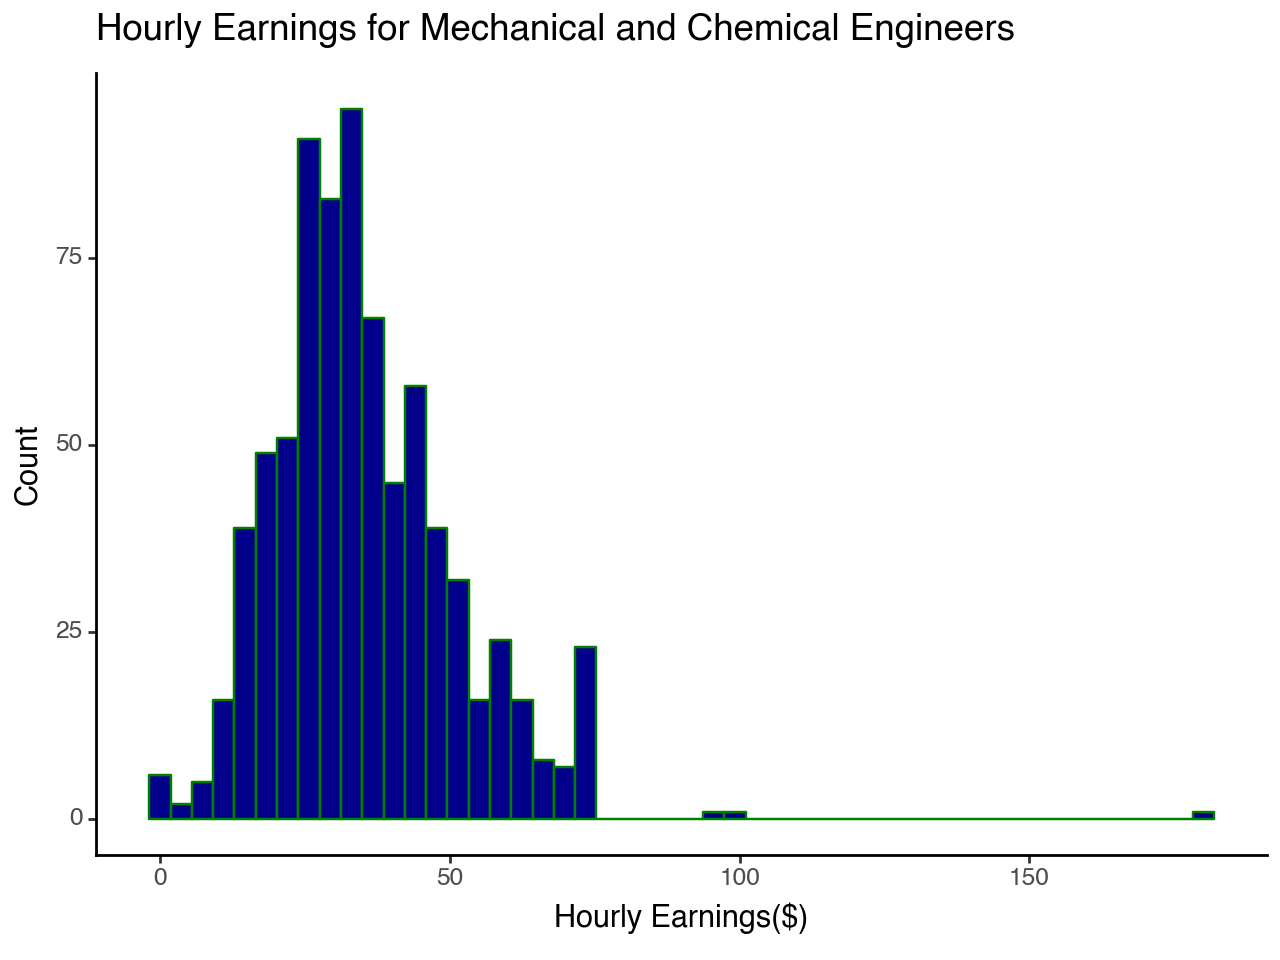

<Figure Size: (640 x 480)>

In [87]:
#distribution of wages
ggplot(data) + aes(x = 'w', y = 'stat(count)') +\
geom_histogram(color = 'green', fill = 'darkblue', bins=50) + theme_classic()+\
labs(title = 'Hourly Earnings for Mechanical and Chemical Engineers', y = 'Count', x = 'Hourly Earnings($)')
#looking at the graph, I would say the distribution is not perfectly normal, but not too far off from normal

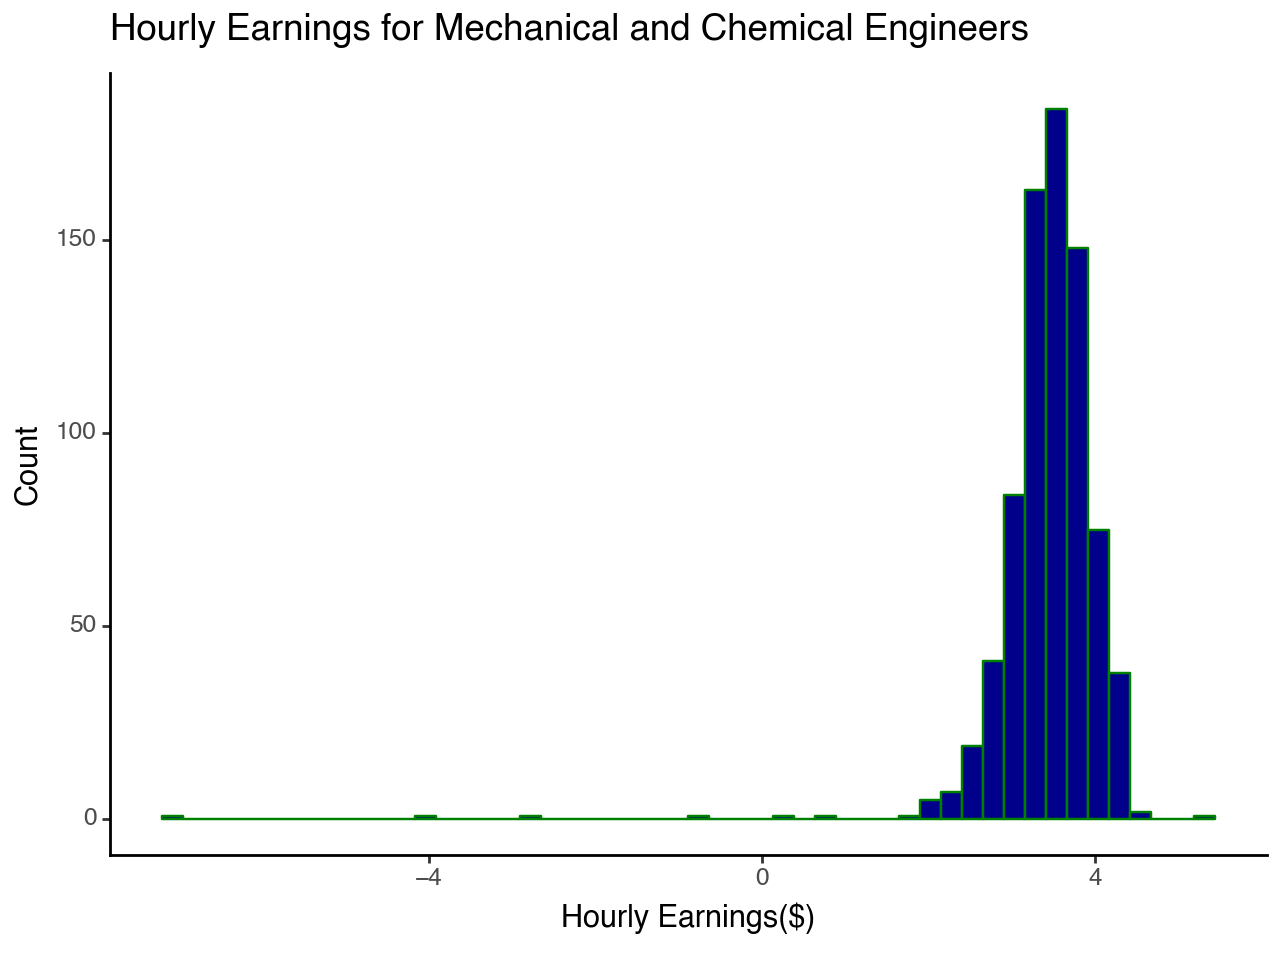

<Figure Size: (640 x 480)>

In [88]:
#taking the log of wages
ggplot(data) + aes(x = 'lnw', y = 'stat(count)') +\
geom_histogram(color = 'green', fill = 'darkblue', bins=50) + theme_classic()+\
labs(title = 'Hourly Earnings for Mechanical and Chemical Engineers', y = 'Count', x = 'Hourly Earnings($)')
#After looking at this graph, I would say this data was better visualized by the level visualization

In [89]:
#more info about wages of engineers
data.loc[:, ["earnwke", "uhourse", "w", "lnw"]].describe()

,earnwke,uhourse,w,lnw
count,792.000000,808.000000,775.000000,775.000000
mean,1484.488321,42.438119,35.384717,-inf
std,650.731043,7.268689,16.066923,NaN
min,0.000000,0.000000,0.000000,-inf
25%,1057.000000,40.000000,25.000000,3.218876
50%,1384.610000,40.000000,32.779545,3.489805
75%,1923.000000,45.000000,43.698523,3.777314
max,2884.610000,90.000000,180.000000,5.192957


In [18]:
#seeing how many engineers are female
data["female"] = data["female"].astype(int)  #from boolean to 0,1
data["female"].value_counts()
#109 engineers are female. There are 869 total mechanical/chemical engineers.
(109/869)*100
print(f"{(109/869)*100}% of mechanical and chemical engineers are women")

12.543153049482164% of mechanical and chemical engineers are women


## Modelling to see distribution of wages for engineers (male versus female)- gender gap

In [95]:
#Earnings of females (level-level regression)
reg1 = smf.ols(formula="w~female", data=data).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      w   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.488
Date:                Fri, 17 Nov 2023   Prob (F-statistic):              0.223
Time:                        19:04:54   Log-Likelihood:                -3250.4
No. Observations:                 775   AIC:                             6505.
Df Residuals:                     773   BIC:                             6514.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.6587      0.619     57.594      0.000      34.443      36.874
female        -2.0821      1.707     -1.220      0.223      -5.432       1.268
==============================================================================
Omnibus:                      291.249   Durbin-Watson:                   1.770
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2460.820
Skew:                           1.459   Prob(JB):                         0.00
Kurtosis:                      11.228   Cond. No.                         3.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

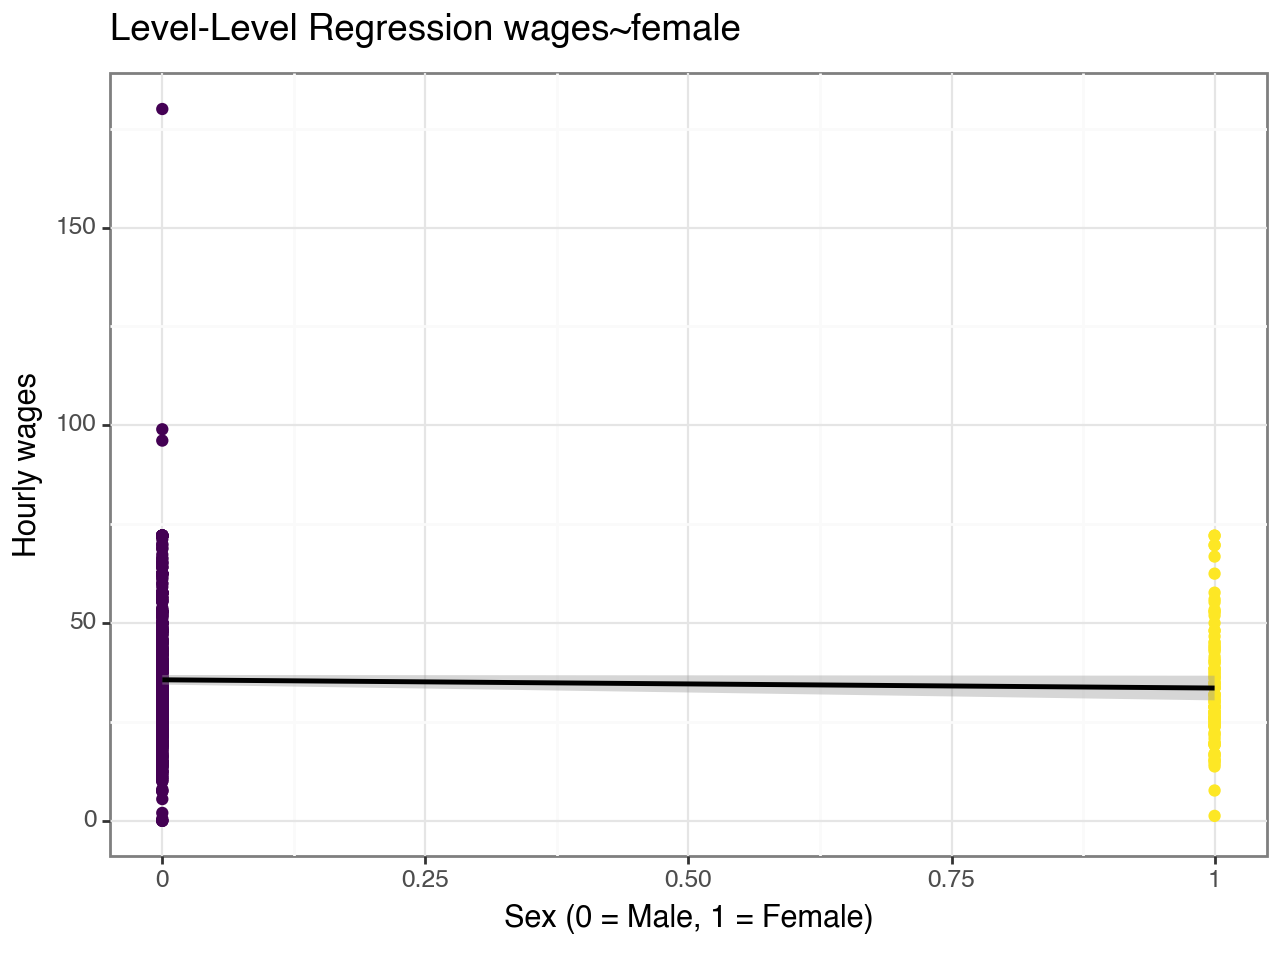

<Figure Size: (640 x 480)>

In [108]:
#level-level regresssion. It is easy to see that there doesn't seem to be much variation in the wages between males
#and females, especially when you know that only about 12% of the engineers are women. There is a very slight 
#negative slope of -2.0821. The regression line also only counts for about .2% of the data- which is very small.
ggplot(data)+ aes(x = 'female', y= 'w', color = 'sex')+theme_bw()+geom_point()+geom_smooth(method = 'lm')+theme(legend_position='none')+\
labs(title = 'Level-Level Regression wages~female', x = 'Sex (0 = Male, 1 = Female)', y = 'Hourly wages')

In [96]:
#Earnings and females (log-level regression)
reg2 = smf.ols(formula="lnw~female", data=data).fit()
reg2.summary()
#get a weird reading with nan values, let's visualize to see why

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lnw   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 17 Nov 2023   Prob (F-statistic):                nan
Time:                        19:05:00   Log-Likelihood:                    nan
No. Observations:                 775   AIC:                               nan
Df Residuals:                     773   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept        -inf        nan        nan        nan         nan         nan
female            inf        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         3.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

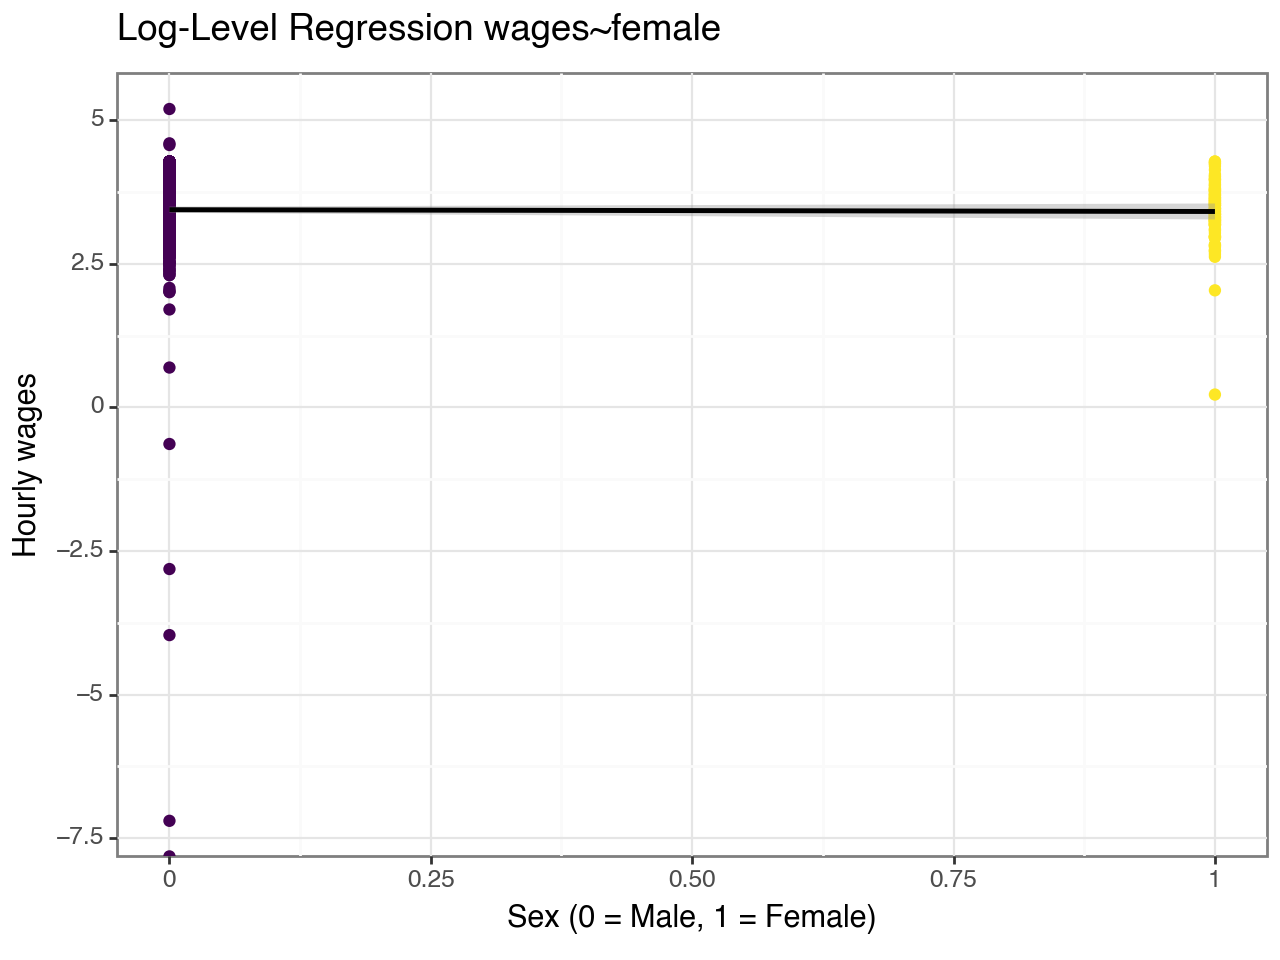

<Figure Size: (640 x 480)>

In [109]:
#the regression line of the log-level regression doesn't seem to fit at all. Using the ln is probably a bad way to go when estimating this regression
ggplot(data)+ aes(x = 'female', y= 'lnw', color = 'sex')+theme_bw()+geom_point()+geom_smooth(method = 'lm')+theme(legend_position='none')+\
labs(title = 'Log-Level Regression wages~female', x = 'Sex (0 = Male, 1 = Female)', y = 'Hourly wages')

Shouldn't do a level-log regression or a log-log regression as ln(1) = 0. Female is 1 for True and Male is 0- can't take that log

# Summary
Looking at the level-level regression:

Slope: female mechanical/chemical engineers earn 2% less, on average than male mechanical/chemical engineers in this data

In 2014 in the USA we can be 95% confident that the average difference between hourly earnings of female mechanical/chemical engineers  versus male was -5% to 1%. The CI includes 0 which means we can't say with 95% confidence that their average earnings (between males and females) are the not same. The t-stat is 1.2 which is less than 1.96 so we can't reject the H0 hypothesis. The p-value is also 0.2 which is much larger than 0.05. The coefficient can't be considered statistically significant at 5%. Also, the R-squared value is 0.002 meaning that the regression line only counts for a mere 0.2% of the data- not a great fit. 


It should be noted that I attempted to do a robust SE test on the data, but due to how weird my data seems to be (hard to fit), I kept getting errors taking about how the F-test could not be conducted on such data. ex. `reg2 = smf.ols(formula="lnw~female", data=data).fit(cov_type="HC1") 
reg2.summary()` returned an error **r_matrix performs f_test for using dimensions that are asymptotically non-normal**

## Modelling to see distribution of wages for engineers by highest level of education completed (male v. female)

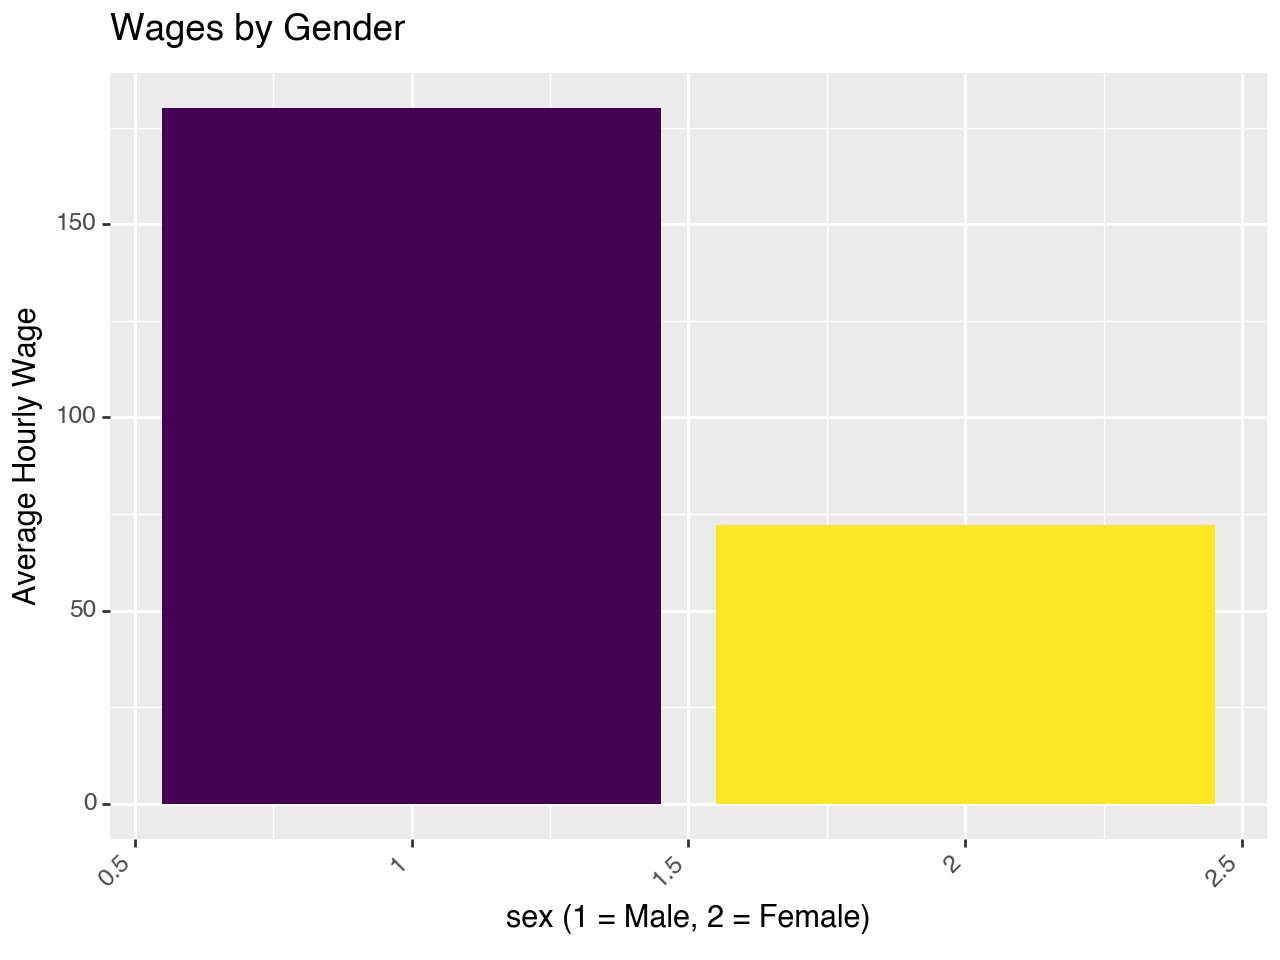

<Figure Size: (640 x 480)>

In [112]:
#wages by gender (overall comparison)
ggplot(data, aes(x='sex', y='w', fill='sex'))+ geom_bar(stat='identity', position='dodge')+theme(axis_text_x=element_text(angle=45, hjust=1))+\
theme(legend_position='none')+labs(title='Wages by Gender', x='sex (1 = Male, 2 = Female)', y='Average Hourly Wage')

In [24]:
data['grade92'].min() #32, 1st-4th grade
data['grade92'].max() #46, doctorate degree
data['grade92'].mean() #about 43, bachelor's degree

42.88837744533947

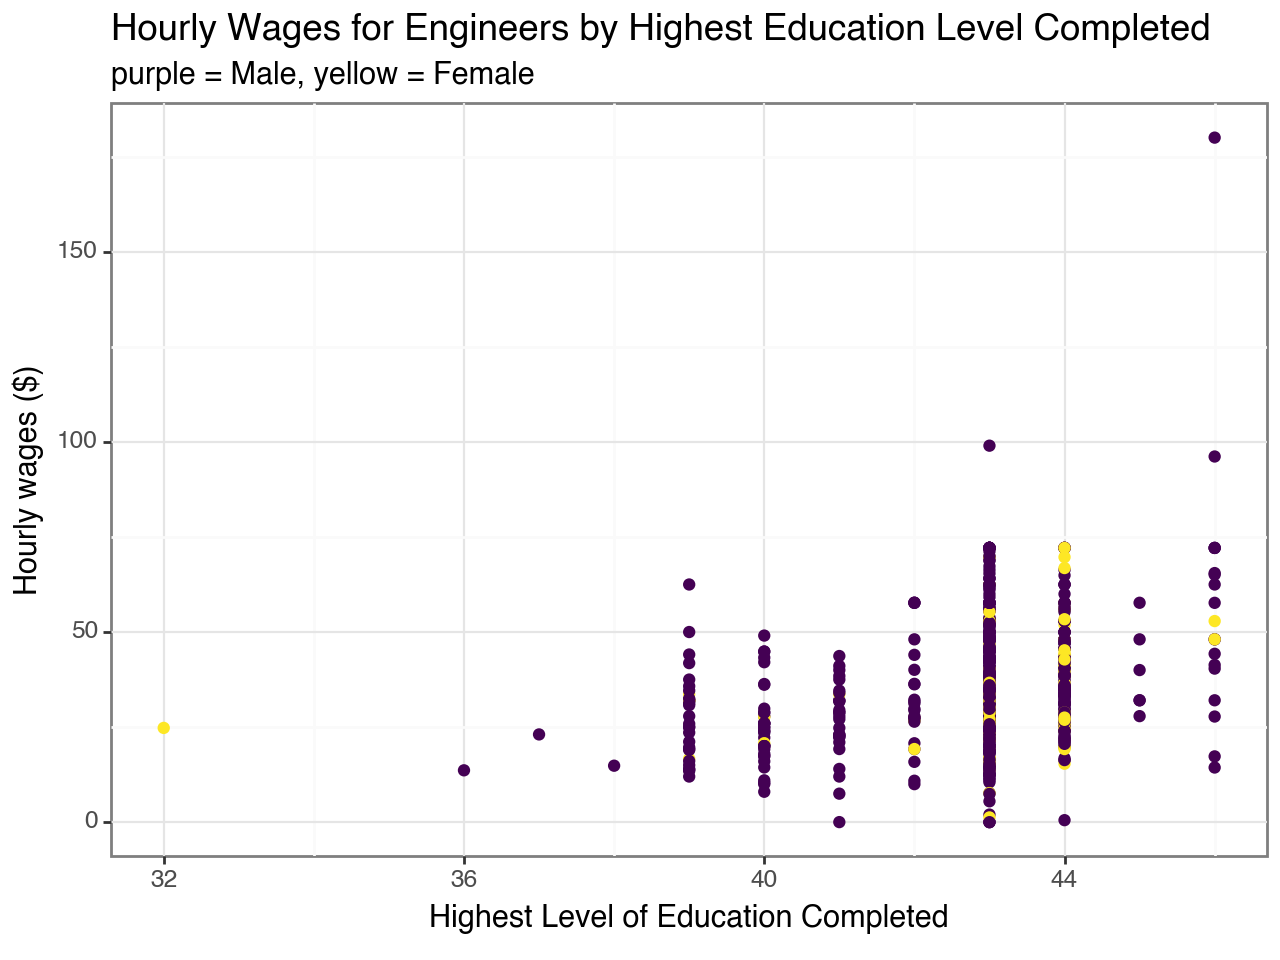

<Figure Size: (640 x 480)>

In [116]:
#gender gap, wages by education
ggplot(data)+ aes(x = 'grade92', y= 'w', color = 'sex')+theme_bw()+geom_point()+\
labs(x = 'Highest Level of Education Completed', y='Hourly wages ($)', 
     title = 'Hourly Wages for Engineers by Highest Education Level Completed', 
     subtitle = 'purple = Male, yellow = Female') + theme(legend_position = 'none')
#levels of education:
#32 = 1st - 4th grade 
#33 = 5th or 6th 
#34 = 7th or 8th 
#35 = 9th 
#36 = 10th 
#37 = 11th 
#38 = 12th grade NO DIPLOMA 
#39 = High school graduate, diploma or GED 
#40 = Some college but no degree 
#41 = Associate degree -- occupational/vocational 
#42 = Associate degree -- academic program 
#43 = Bachelor's degree (e.g. BA,AB,BS) 
#44 = Master's degree (e.g. MA,MS,MEng,Med,MSW,MBA) 
#45 = Professional school deg. (e.g. MD,DDS,DVM,LLB,JD) 
#46 = Doctorate degree (e.g. PhD, EdD) 


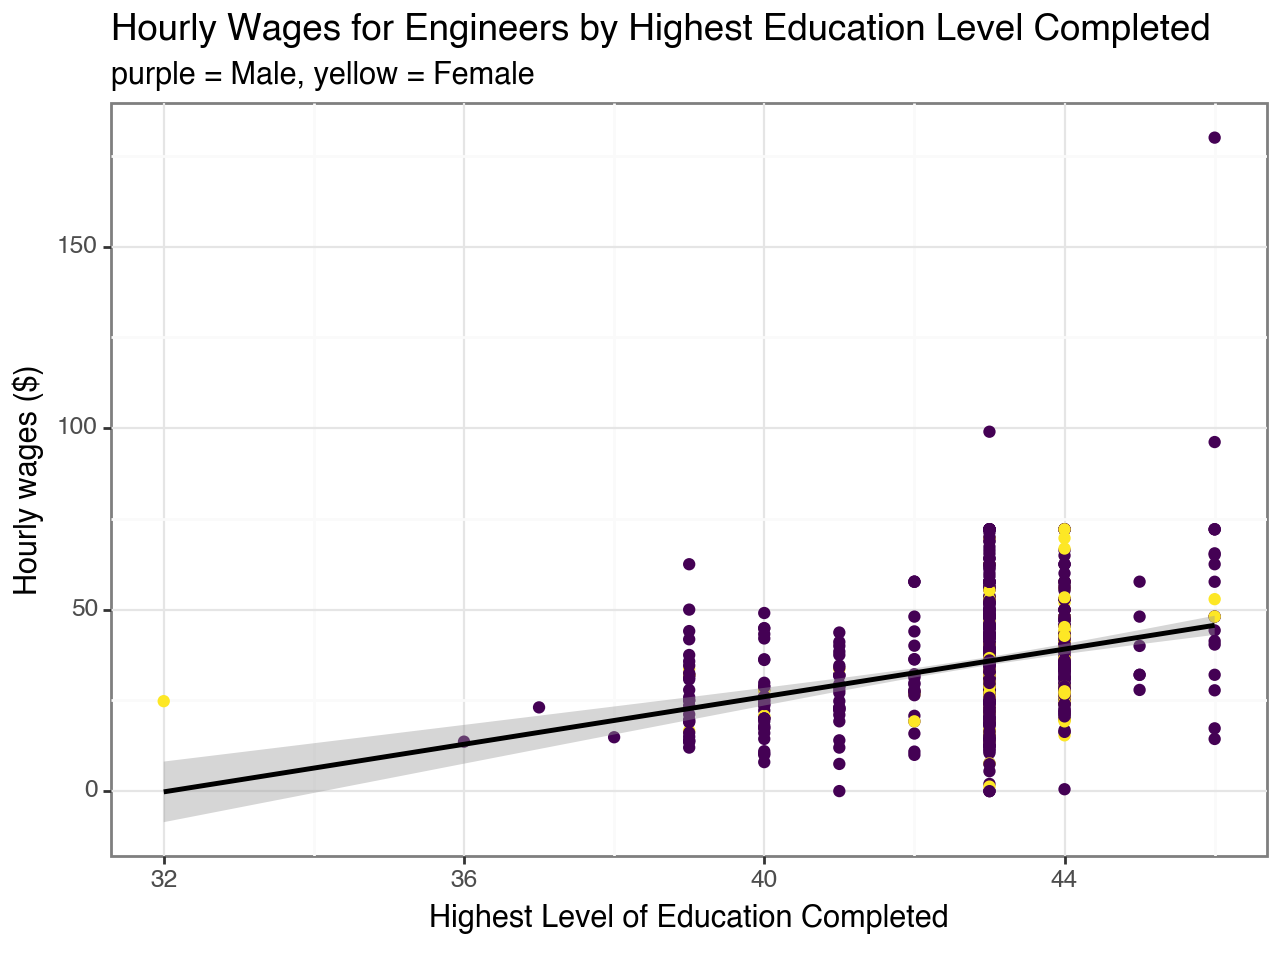

<Figure Size: (640 x 480)>

In [119]:
#same as above, but adding regression line
model = sm.OLS(data['w'], sm.add_constant(data[['grade92', 'female']])).fit()

In [131]:
reg3 = smf.ols(formula="w ~ grade92 + female", data=data).fit()

In [132]:
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      w   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     37.16
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           3.91e-16
Time:                        19:32:43   Log-Likelihood:                -3215.6
No. Observations:                 775   AIC:                             6437.
Df Residuals:                     772   BIC:                             6451.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -106.1029     16.638     -6.377      0.000    -138.764     -73.442
grade92        3.3098      0.388      8.526      0.000       2.548       4.072
female        -2.7725      1.635     -1.696      0.090      -5.981       0.436
==============================================================================
Omnibus:                      259.563   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1926.424
Skew:                           1.308   Prob(JB):                         0.00
Kurtosis:                      10.267   Cond. No.                     1.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Summary
Looking at the data on wages of engineers by highest level of education completed (male vs female):

Slope: an increase in grade level means 3.3 more dollars in wages; however, if you're a woman, it also means 2.7 dollars less in wages per education level increase. (Could perhaps look at this like for a woman, an increase in education level means slope(grade92)-slope(female) or 0.53 dollar increase in wages for every increase in education level.

The p value for sex in regards to wages and education level is 0.090 which is more than 0.05 so we most likely fail to reject the null that there is a difference in wages for education level/sex for these engineers. We can be 95% confident that the average difference between hourly earnings of female mechanical/chemical engineers based on education level versus male is -5.9% to 0.4%. The CI includes 0 which means we can't say with 95% confidence that their average earnings are not the same. The R-squared value is 0.088 meaning that the regression line counts for 8.8% of the data- which isn't bad.
